# DSC630 Week 12 Assignment 12.2
# Name: Madhuri Basava
# Date: 3/01/2024

### Project: Autism Prediction

#### Data soure was taken from Kaggle website: https://www.kaggle.com/code/raselmeya/asd-predictions-with-8-different-models-85-7/notebook

### Methods/Results

#### Import the necessary packages

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from pandas.api.types import CategoricalDtype

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif,f_classif
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.neural_network import MLPClassifier 
from category_encoders.target_encoder import TargetEncoder
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,RobustScaler
from category_encoders import MEstimateEncoder
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier,VotingClassifier
from sklearn.metrics import roc_auc_score, roc_curve,\
    confusion_matrix, ConfusionMatrixDisplay

#### Read the train data and test data from csv files and load the datasets as Pandas data frames.

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

train

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,0,1,0,0,0,0,0,0,1,...,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,...,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,...,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,...,f,?,no,no,Canada,no,9.069342,18 and more,Self,0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [4]:
# pip install skimpy

#### Descriptive statistics for training data

In [5]:
from skimpy import skim
skim(train)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 800    │ │ int32       │ 12    │                                                          │
│ │ Number of columns │ 22     │ │ string      │ 8     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %    ┃ mean    ┃ sd      ┃ p0     ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ ID                │    0 │       0 │     400 │     230 │      1 │   200 │   400 │   600 │    800 │ ▇▇▇▇▇▇  │  │
│ │ A1_Score          │    0 │       0 │    0.56 │     0.5 │      0 │     0 │     1 │     1 │      1 │ ▆    ▇  │  │
│ │ A2_Score          │    0 │       0 │    0.53 │     0.5 │      0 │     0 │     1 │     1 │      1 │ ▇    ▇  │  │
│ │ A3_Score          │    0 │       0 │    0.45 │     0.5 │      0 │     0 │     0 │     1 │      1 │ ▇    ▇  │  │
│ │ A4_Score          │    0 │       0 │    0.41 │    0.49 │      0 │     0 │     0 │     1 │      1 │ ▇    ▆  │  │
│ │ A5_Score          │    0 │       0 │     0.4 │    0.49 │      0 │     0 │     0 │     1 │      1 │ ▇    ▅  │  │
│ │ A6_Score          │    0 │       0 │     0.3 │    0.46 │      0 │     0 │     0 │     1 │      1 │ ▇    ▃  │  │
│ │ A7_Score          │    0 │       0 │     0.4 │    0.49 │      0 │     0 │     0 │     1 │      1 │ ▇    ▅  │  │
│ │ A8_Score          │    0 │       0 │    0.51 │     0.5 │      0 │     0 │     1 │     1 │      1 │ ▇    ▇  │  │
│ │ A9_Score          │    0 │       0 │    0.49 │     0.5 │      0 │     0 │     0 │     1 │      1 │ ▇    ▇  │  │
│ │ A10_Score         │    0 │       0 │    0.62 │    0.49 │      0 │     0 │     1 │     1 │      1 │ ▅    ▇  │  │
│ │ age               │    0 │       0 │      28 │      16 │    2.7 │    17 │    25 │    36 │     89 │  ▅▇▃▂▁  │  │
│ │ result            │    0 │       0 │     8.5 │     4.8 │   -6.1 │   5.3 │   9.6 │    13 │     16 │  ▂▃▆▇▇  │  │
│ │ Class/ASD         │    0 │       0 │     0.2 │     0.4 │      0 │     0 │     0 │     0 │      1 │ ▇    ▂  │  │
│ └───────────────────┴──────┴─────────┴─────────┴─────────┴────────┴───────┴───────┴───────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                     ┃ NA     ┃ NA %       ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ gender                          │      0 │          0 │                          1 │                   800 │  │
│ │ ethnicity                       │      0 │          0 │                        1.3 │                  1028 │  │
│ │ jaundice                        │      0 │          

In [6]:
train.shape

(800, 22)

#### Plot the histograms for training data

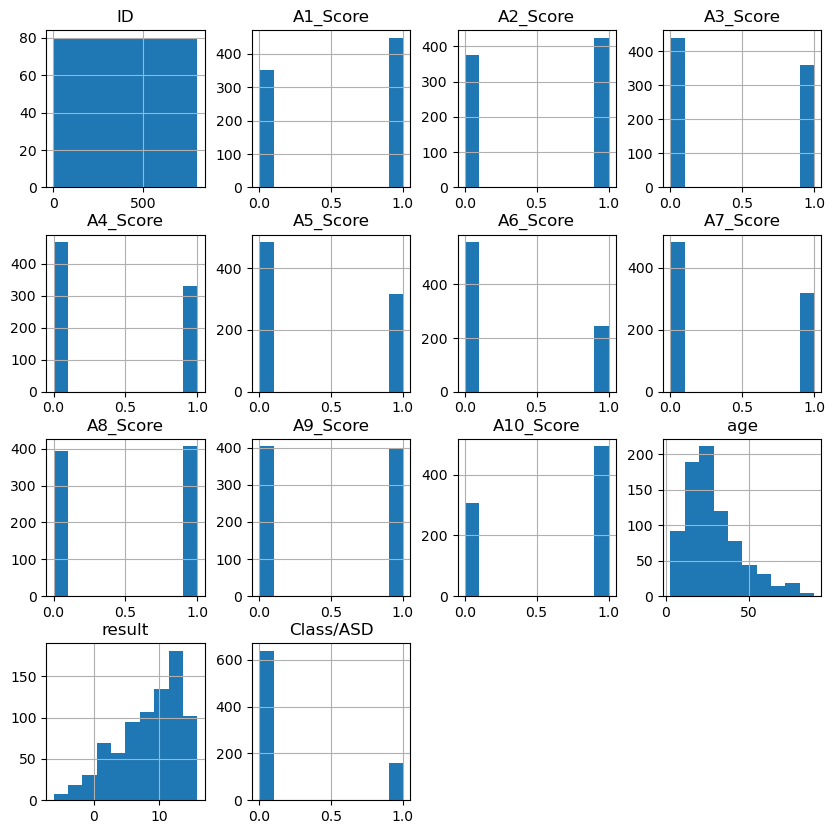

In [7]:
train.hist(figsize=(10,10))
plt.show()

#### Descriptive statistics for test data

In [8]:
from skimpy import skim
skim(test)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 200    │ │ int32       │ 11    │                                                          │
│ │ Number of columns │ 21     │ │ string      │ 8     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %    ┃ mean    ┃ sd      ┃ p0     ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ ID                │    0 │       0 │     100 │      58 │      1 │    51 │   100 │   150 │    200 │ ▇▇▇▇▇▇  │  │
│ │ A1_Score          │    0 │       0 │    0.57 │     0.5 │      0 │     0 │     1 │     1 │      1 │ ▆    ▇  │  │
│ │ A2_Score          │    0 │       0 │    0.56 │     0.5 │      0 │     0 │     1 │     1 │      1 │ ▆    ▇  │  │
│ │ A3_Score          │    0 │       0 │    0.47 │     0.5 │      0 │     0 │     0 │     1 │      1 │ ▇    ▇  │  │
│ │ A4_Score          │    0 │       0 │    0.42 │     0.5 │      0 │     0 │     0 │     1 │      1 │ ▇    ▆  │  │
│ │ A5_Score          │    0 │       0 │    0.45 │     0.5 │      0 │     0 │     0 │     1 │      1 │ ▇    ▇  │  │
│ │ A6_Score          │    0 │       0 │    0.34 │    0.47 │      0 │     0 │     0 │     1 │      1 │ ▇    ▅  │  │
│ │ A7_Score          │    0 │       0 │    0.42 │    0.49 │      0 │     0 │     0 │     1 │      1 │ ▇    ▆  │  │
│ │ A8_Score          │    0 │       0 │    0.55 │     0.5 │      0 │     0 │     1 │     1 │      1 │ ▇    ▇  │  │
│ │ A9_Score          │    0 │       0 │    0.54 │     0.5 │      0 │     0 │     1 │     1 │      1 │ ▇    ▇  │  │
│ │ A10_Score         │    0 │       0 │    0.64 │    0.48 │      0 │     0 │     1 │     1 │      1 │ ▅    ▇  │  │
│ │ age               │    0 │       0 │      26 │      15 │    4.8 │    16 │    23 │    32 │     77 │  ▆▇▃▁▁  │  │
│ │ result            │    0 │       0 │     8.7 │     4.7 │   -5.7 │   5.6 │   9.8 │    12 │     16 │  ▂▅▅▇▇  │  │
│ └───────────────────┴──────┴─────────┴─────────┴─────────┴────────┴───────┴───────┴───────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                     ┃ NA     ┃ NA %       ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ gender                          │      0 │          0 │                          1 │                   200 │  │
│ │ ethnicity                       │      0 │          0 │                        1.3 │                   263 │  │
│ │ jaundice                        │      0 │          0 │                          1 │                   200 │  │
│ │ austim                          │      0 │          

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               200 non-null    int64  
 1   A1_Score         200 non-null    int64  
 2   A2_Score         200 non-null    int64  
 3   A3_Score         200 non-null    int64  
 4   A4_Score         200 non-null    int64  
 5   A5_Score         200 non-null    int64  
 6   A6_Score         200 non-null    int64  
 7   A7_Score         200 non-null    int64  
 8   A8_Score         200 non-null    int64  
 9   A9_Score         200 non-null    int64  
 10  A10_Score        200 non-null    int64  
 11  age              200 non-null    float64
 12  gender           200 non-null    object 
 13  ethnicity        200 non-null    object 
 14  jaundice         200 non-null    object 
 15  austim           200 non-null    object 
 16  contry_of_res    200 non-null    object 
 17  used_app_before 

In [10]:
test.shape

(200, 21)

#### Plot the histograms for test data

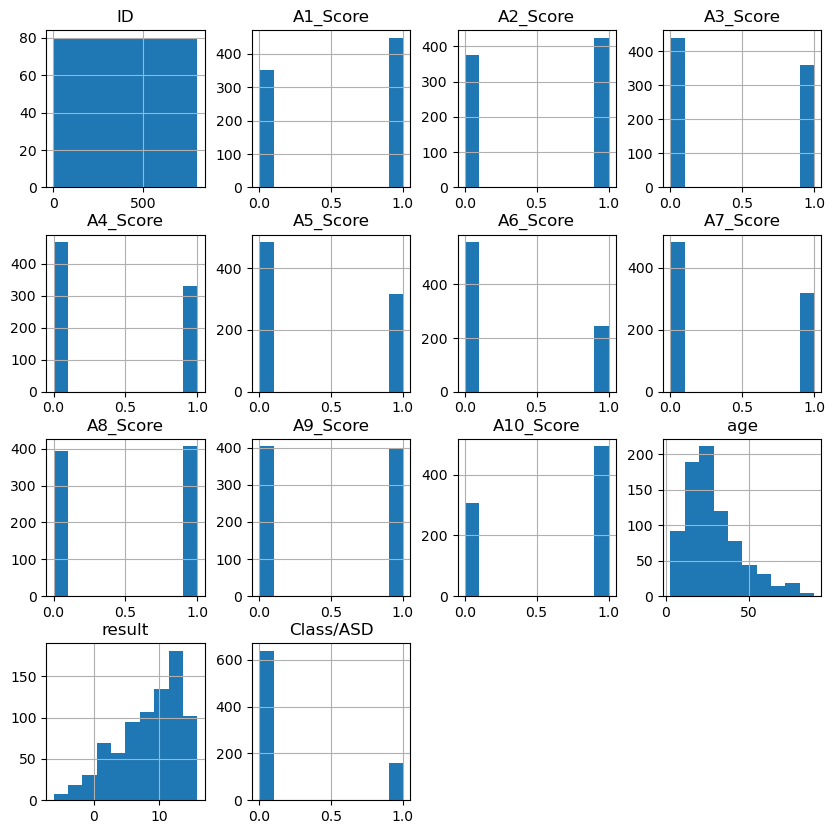

In [11]:
train.hist(figsize=(10,10))
plt.show()

#### Data Visualizations: 
#### Evaluate the correlation between the variables in the dataset.

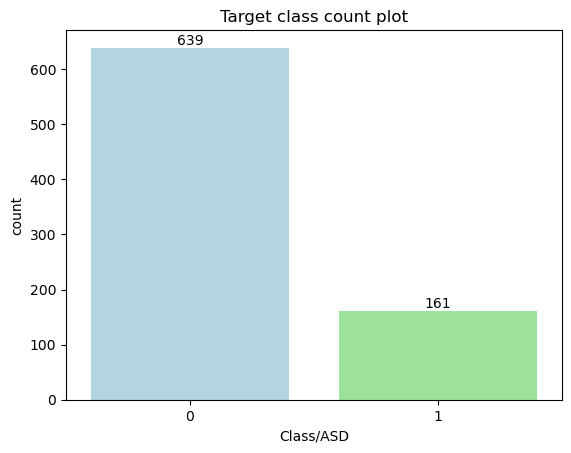

In [12]:
# Target distibution
plt.figure()
color = ['lightblue', 'lightgreen']
ax = sns.countplot(data=train,x='Class/ASD',\
                  palette=color)
ax.bar_label(ax.containers[0])
plt.title("Target class count plot")
plt.show()

#### The target class distribution looks imbalanced, so need to resample before modeling.

#### Gender Vs Autism

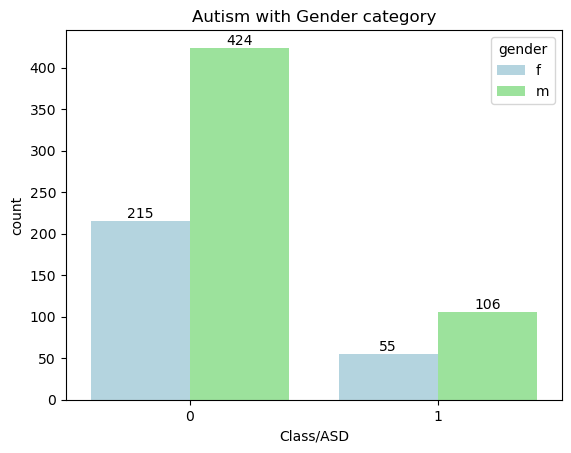

In [13]:
plt.figure()
color = ['lightblue', 'lightgreen']
ax = sns.countplot(data=train,x='Class/ASD',hue='gender',\
                   palette=color)
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i])
plt.title("Autism with Gender category")
plt.show()


#### From the above chart, we can conclude that the female percentage is approximately half of the male percentage in both those not having autism conditions and those with autism conditions.

#### Jaundice Vs Autism

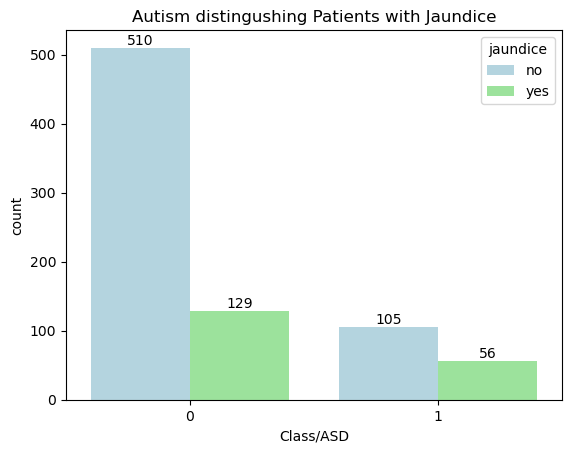

In [14]:
plt.figure()
color = ['lightblue', 'lightgreen']
ax = sns.countplot(data=train,x='Class/ASD',hue='jaundice', \
                   palette=color)
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i])
plt.title("Autism distingushing Patients with Jaundice")
plt.show()

#### From the above graph, we can conclude that at least half of the patients with autism have Jaundice.

####  Autism with relative conditions in Family

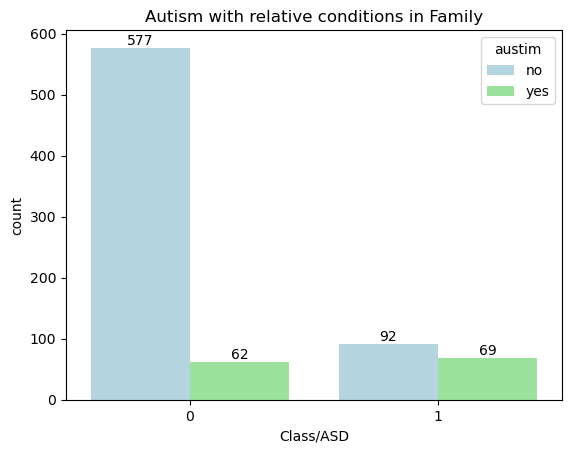

In [15]:
plt.figure()
color = ['lightblue', 'lightgreen']
ax = sns.countplot(data=train,x='Class/ASD',hue='austim', \
                   palette=color)
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i])
plt.title("Autism with relative conditions in Family")
plt.show()

#### From the above graph, we can conclude that most patients have relatives with autism in the family.

#### Autism based on app usage

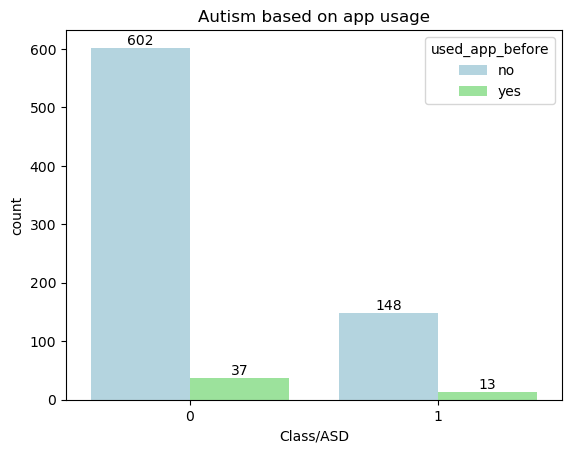

In [16]:
plt.figure()
color = ['lightblue', 'lightgreen']
ax = sns.countplot(data=train,x='Class/ASD',hue='used_app_before',\
                  palette=color)
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i])
plt.title("Autism based on app usage")
plt.show()

#### From the above graph, we can conclude that autism does not depend on app usage.

#### Age vs Autism

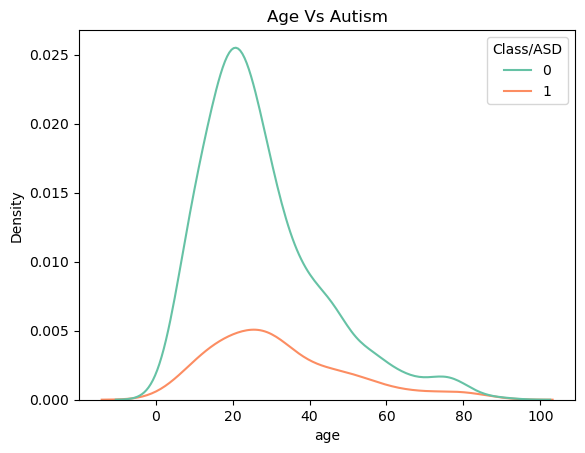

In [17]:
plt.figure()
ax = sns.kdeplot(data=train,x='age',hue='Class/ASD', \
                 palette="Set2")
plt.title("Age Vs Autism")
plt.show()

#### Plots of Autism scores


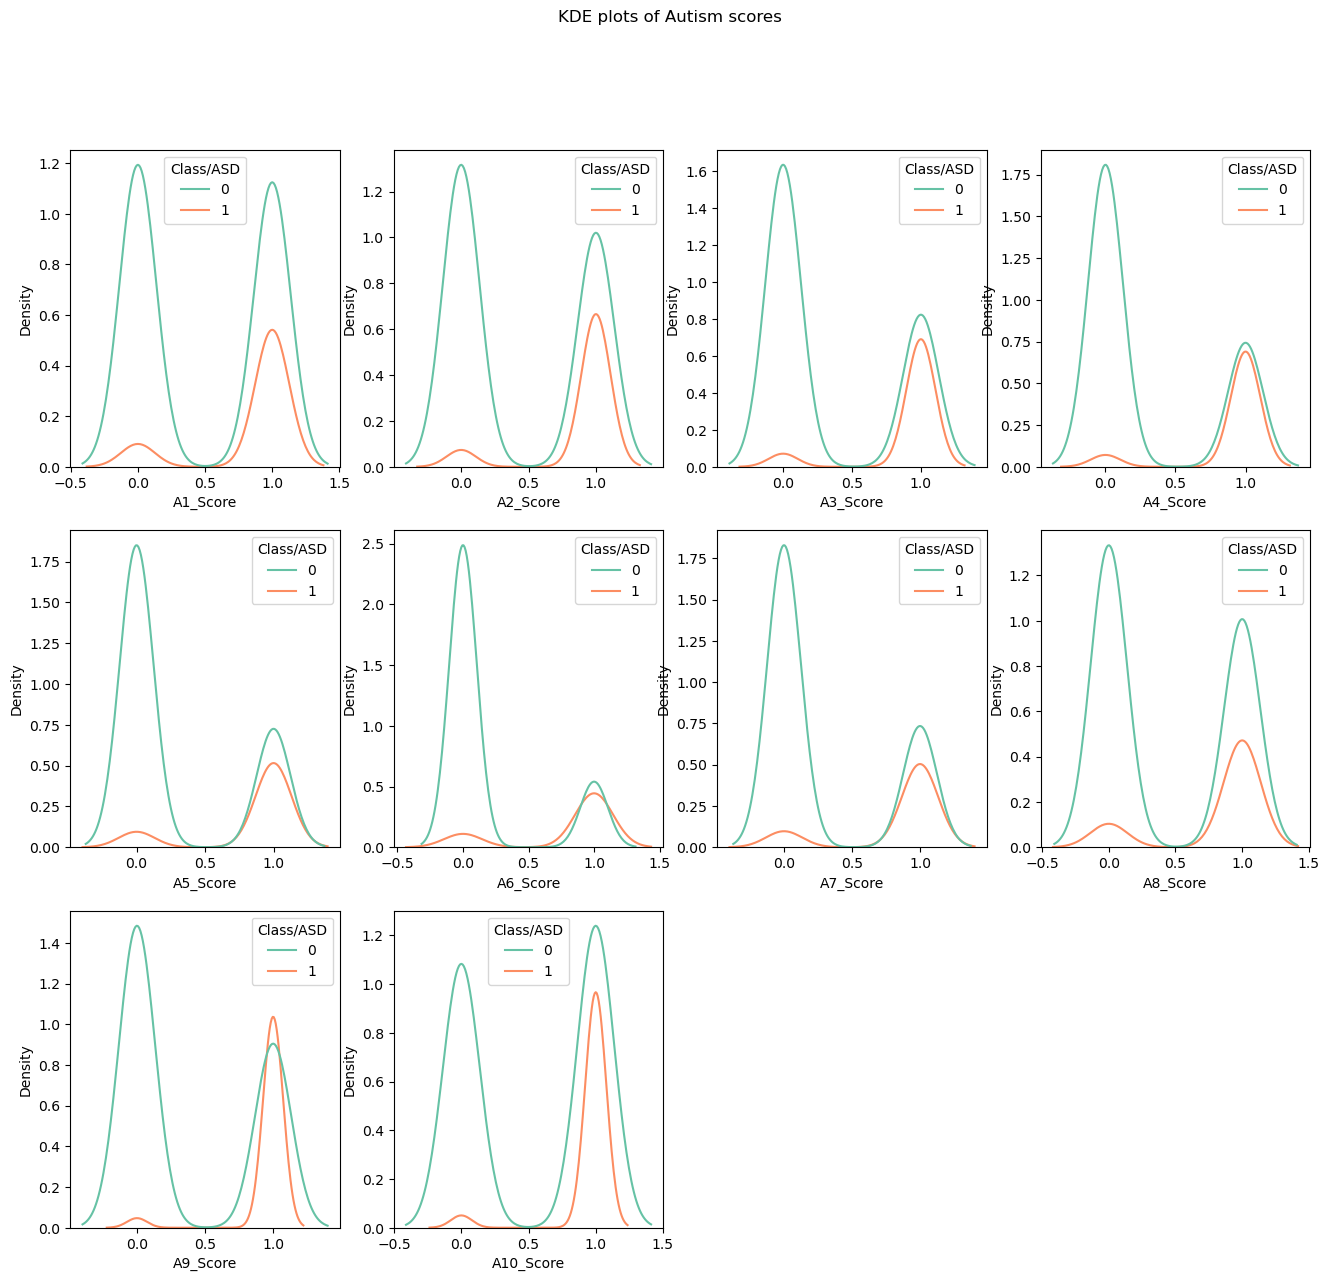

In [18]:
plt.figure(figsize=(16,14))
for i in range(1,11):
    score = "A"+str(i)+"_Score"
    plt.subplot(3,4,i)
    sns.kdeplot(data=train,x=score,hue='Class/ASD', \
                palette="Set2")
plt.suptitle("KDE plots of Autism scores")
plt.show()

#### Exploratory Data Analysis(EDA): Perform the EDA to understand the characteristics of the data set.

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

#### Null values are not present in the training set.

In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               200 non-null    int64  
 1   A1_Score         200 non-null    int64  
 2   A2_Score         200 non-null    int64  
 3   A3_Score         200 non-null    int64  
 4   A4_Score         200 non-null    int64  
 5   A5_Score         200 non-null    int64  
 6   A6_Score         200 non-null    int64  
 7   A7_Score         200 non-null    int64  
 8   A8_Score         200 non-null    int64  
 9   A9_Score         200 non-null    int64  
 10  A10_Score        200 non-null    int64  
 11  age              200 non-null    float64
 12  gender           200 non-null    object 
 13  ethnicity        200 non-null    object 
 14  jaundice         200 non-null    object 
 15  austim           200 non-null    object 
 16  contry_of_res    200 non-null    object 
 17  used_app_before 

#### Null values are not present in the test set.

In [21]:
train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [22]:
test.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation
0,1,1,1,0,0,1,1,0,0,1,...,15.599481,m,White-European,yes,no,India,no,12.399055,18 and more,Self
1,2,1,0,0,0,0,0,0,1,0,...,27.181099,m,Asian,no,no,Mexico,no,6.551598,18 and more,Self
2,3,1,1,1,0,1,1,0,1,1,...,31.643906,m,White-European,yes,no,Egypt,no,3.180663,18 and more,Self
3,4,0,0,0,0,0,0,0,0,0,...,25.369210,m,?,no,no,India,no,2.220766,18 and more,Self
4,5,0,0,0,1,0,0,0,0,0,...,9.078580,m,?,no,no,Italy,no,7.252028,18 and more,Self


In [23]:
train.age_desc.value_counts()

age_desc
18 and more    800
Name: count, dtype: int64

In [24]:
test.age_desc.value_counts()

age_desc
18 and more    200
Name: count, dtype: int64

#### Clean the data set. Remove the unnecessary features: 
#### Since `age_desc` column has only one unique value, this column can be removed from the data sets. Also `ID` column is not relevant here. So it also can be removed.

In [25]:
train_set=train.copy()
test_set=test.copy()

train_set.drop(['age_desc','ID'],axis=1,inplace=True)

test_set.drop(['age_desc','ID'],axis=1,inplace=True)

#### Calculate the CHI2

In [26]:
def chi2_calc(df,target):
    scores=[]
    for col in df.columns:
        ct=pd.crosstab(df[col],target)
        stat,p,dof,expected=chi2_contingency(ct)
        scores.append(p)
    return pd.DataFrame(scores, index=df.columns, \
                        columns=['P value']).sort_values(by='P value')

In [27]:
chi2_calc(train[train.columns.difference(['age', 'result'])],\
          train['Class/ASD'])

,P value
Class/ASD,1.207742e-174
A6_Score,1.353680e-52
A4_Score,4.884021e-45
A9_Score,9.762852e-39
A5_Score,1.793100e-38
A3_Score,2.400756e-38
A7_Score,5.621313e-37
ethnicity,6.321928e-33
A2_Score,1.399801e-25
austim,1.006056e-23


#### Using CHI2, we see that `gender` and `used_app_before` columns can be dropped.

In [28]:
train_set.drop(['gender','used_app_before'],axis=1,inplace=True)
test_set.drop(['gender','used_app_before'],axis=1,inplace=True)

#### Separate the target column from the rest of the data

In [29]:
y=train_set.pop('Class/ASD')

#### Using K-fold to separate train/validation

In [30]:
np.random.seed(1) #I'm using this because there's some
#randomness in how the selectors work, without this,
# in each run we get different results
#for cross validation/ random_state
kf = StratifiedKFold(n_splits=2, random_state=None,shuffle=False) 
# is None because shuffle is False
score=[]

for train_index, val_index in kf.split(train_set,y):
    
    #indices for train and validation sets
    X_train, X_val =train_set.iloc[train_index,:], train_set.iloc[val_index,:]
    y_train, y_val = y[train_index], y[val_index]
    
    # CLEANING 

    #for train set
    X_train.ethnicity=X_train.ethnicity.str.replace('others','Others',regex=False)
    X_train.ethnicity=X_train.ethnicity.str.replace('?','Others',regex=False)
    X_train.relation=X_train.relation.str.replace('?','Others',regex=False)
    X_train.relation=X_train.relation.str.replace('Health care professional','Others',\
                                                  regex=False)
    
    
    #for validation set:
    X_val.ethnicity=X_val.ethnicity.str.replace('others','Others',regex=False)
    X_val.ethnicity=X_val.ethnicity.str.replace('?','Others',regex=False)
    X_val.relation=X_val.relation.str.replace('?','Others',regex=False)
    X_val.relation=X_val.relation.str.replace('Health care professional',\
                                              'Others',regex=False)

  
    # ENCODING
    
    #FOR ENCODING USE THE TRAINING VALUES, DO NOT CALCULATE THEM AGAIN FOR THE TEST SET!
    
    le=LabelEncoder()
    for col in ['jaundice','austim']:
        
        #for the training set:
        X_train[col]=le.fit_transform(X_train[col])
        
        #for the validation set:
        X_val[col]=le.transform(X_val[col])
         

    # Encoding Relation Column
    
    #create an encoding map, using the training set, 
    #then implementing it on val and test sets
    rel=X_train.relation.value_counts()
    rel=dict(zip(rel.index,range(len(rel))))
    
    #for the training set:
    X_train.relation=X_train.relation.map(rel)
    
    #for the validation set: if there's a category not present in the map,
    #we'll assign sth. to it
    X_val.relation=X_val.relation.map(rel)
    X_val.relation[X_val.relation.isna()]=len(rel)
    
    
    
    # Encoding Ethnicity Column
    
    #create an encoding map, using the training set, 
    #then implementing it on val and test sets
    eth=X_train.ethnicity.value_counts()
    eth=dict(zip(eth.index,range(len(eth))))
    
    #for the training set:
    X_train.ethnicity=X_train.ethnicity.map(eth)
    
    #for the validation set: if there's a category not present in the map,
    #we'll assign sth. to it
    X_val.ethnicity=X_val.ethnicity.map(eth)
    X_val.ethnicity[X_val.ethnicity.isna()]=len(eth)
    
    
    #Encoding 'Country Of Res' column
    
    #create an encoding map, using the training set, 
    #then implementing it on val and test sets
    cont=X_train.contry_of_res.value_counts()
    cont=dict(zip(cont.index,range(len(cont))))
    
    #for the training set:
    X_train.contry_of_res=X_train.contry_of_res.map(cont)
    
    #for the validation set: if there's a category not present in the map,
    #we'll assign sth. to it
    X_val.contry_of_res=X_val.contry_of_res.map(cont)
    X_val.contry_of_res[X_val.contry_of_res.isna()]=len(cont)

    # Standardization    
    rs=RobustScaler()
    X_train[['result','age']]=rs.fit_transform(X_train[['result','age']])
    X_val[['result','age']]=rs.transform(X_val[['result','age']])            
   

In [31]:
X_train

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,ethnicity,jaundice,austim,contry_of_res,result,relation
0,1,0,1,0,1,0,1,0,1,1,0.701285,1,0,0,10,-0.458659,0
1,0,0,0,0,0,0,0,0,0,0,1.230906,1,0,0,1,-1.032994,0
2,1,1,1,1,1,1,1,1,1,1,-1.001438,0,0,1,0,0.733248,0
3,0,0,0,0,0,0,0,0,0,0,-0.106648,1,0,0,0,-1.029989,0
4,0,0,0,0,0,0,0,0,0,0,0.979597,1,0,0,24,-2.019081,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1,0,0,0,0,1,1,0,0,1,1.669222,6,1,0,3,-0.985177,0
396,1,1,1,1,1,0,1,0,1,1,-0.860188,0,1,0,7,0.364399,0
397,0,0,0,0,0,0,0,0,0,0,0.753407,1,0,0,10,-0.904295,0
398,0,0,0,0,1,0,0,1,0,1,-0.414264,0,0,1,12,0.396489,0


#### Model Selection from 8 different Models ('KNearestNeighbours', 'DecisionTree', 'LGBM','XGBRF','CatBoostClassifier','RandomForest','Logistic Regression', 'SVC')
#### Create a confusion matrix to show the performance of each model to evaluate the predicted values from the model vs. the actual values from the test dataset.

In [32]:
model_list = ['KNearestNeighbours', 'DecisionTree', 'LGBM','XGBRF',\
              'CatBoostClassifier','RandomForest','Logistic Regression', 'SVC' ]

#### 1) KNearestNeighbours Model

In [33]:
kn_clf = KNeighborsClassifier(n_neighbors=6)
kn_clf.fit(X_train,y_train)
y_pred=pd.DataFrame(kn_clf.predict_proba(X_val))[1].values
score.append(roc_auc_score(y_val,y_pred))
np.array(score)


array([0.88091644])

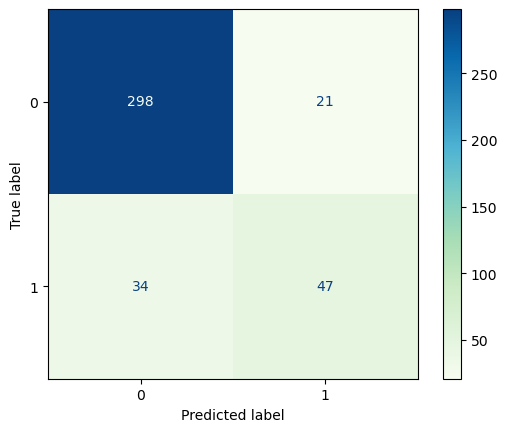

In [34]:
# Display Confusion Metrics
cm = confusion_matrix(y_val, kn_clf.predict(X_val))
cmd = ConfusionMatrixDisplay(cm)
cmd.plot(cmap='GnBu');

#### 2) DecisionTree Model

In [35]:
dt_clf = DecisionTreeClassifier(max_leaf_nodes=10, \
                                random_state=0, criterion='entropy')
dt_clf.fit(X_train, y_train)
y_pred=pd.DataFrame(dt_clf.predict_proba(X_val))[1].values
score.append(roc_auc_score(y_val,y_pred))
    
np.array(score)

array([0.88091644, 0.78857541])

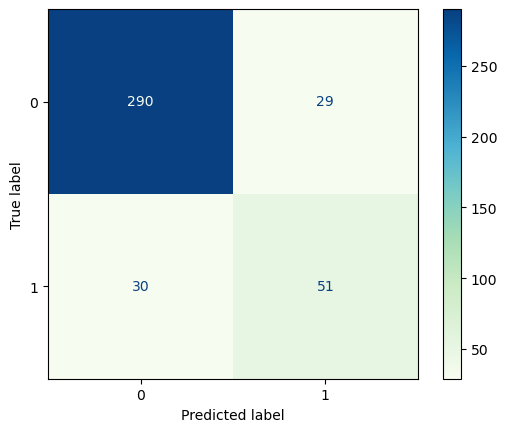

In [36]:
cm = confusion_matrix(y_val, dt_clf.predict(X_val))
cmd = ConfusionMatrixDisplay(cm)
cmd.plot(cmap='GnBu');

In [37]:
# pip install lightgbm

#### 3) Light Gradient-Boosting Machine Model

In [38]:
#  lightgbm 
import lightgbm
lgb_clf = lightgbm.LGBMClassifier(max_depth=2, random_state=4)
lgb_clf.fit(X_train, y_train)
y_pred=pd.DataFrame(lgb_clf.predict_proba(X_val))[1].values
score.append(roc_auc_score(y_val,y_pred))
np.array(score)

[LightGBM] [Info] Number of positive: 80, number of negative: 320
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 339
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


array([0.88091644, 0.78857541, 0.923391  ])

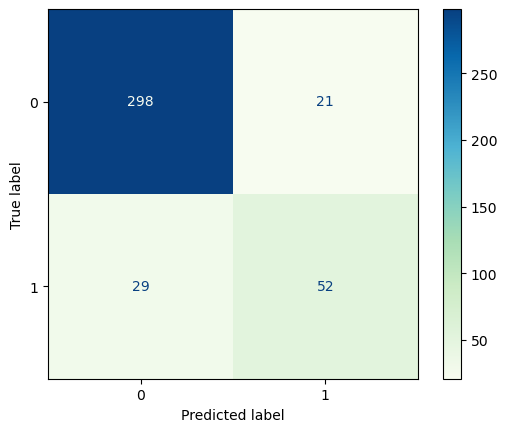

In [39]:
cm = confusion_matrix(y_val, lgb_clf.predict(X_val))
cmd = ConfusionMatrixDisplay(cm)
cmd.plot(cmap='GnBu');

#### 4) Random Forests(TM) in XGBoost Model

In [40]:
import xgboost
xgb_clf = xgboost.XGBRFClassifier(max_depth=4, random_state=1)
xgb_clf.fit(X_train, y_train)
y_pred=pd.DataFrame(xgb_clf.predict_proba(X_val))[1].values
score.append(roc_auc_score(y_val,y_pred))
    
np.array(score)

array([0.88091644, 0.78857541, 0.923391  , 0.92329425])

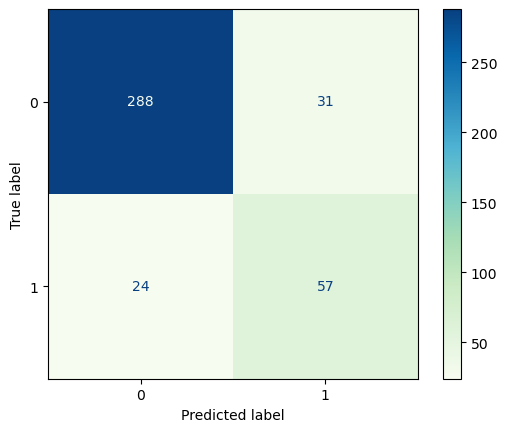

In [41]:
cm = confusion_matrix(y_val, xgb_clf.predict(X_val))
cmd = ConfusionMatrixDisplay(cm)
cmd.plot(cmap='GnBu');

In [42]:
# pip install catboost

#### 5) Categorical Boosting Model

In [43]:
#cathboost
from catboost import CatBoostClassifier
cat_model = CatBoostClassifier(iterations=100,depth=10,\
                     random_state=42,auto_class_weights='Balanced')
cat_model.fit(X_train,y_train,plot=False,verbose=0)
y_pred=pd.DataFrame(cat_model.predict_proba(X_val))[1].values
score.append(roc_auc_score(y_val,y_pred))
    
np.array(score)

array([0.88091644, 0.78857541, 0.923391  , 0.92329425, 0.92542281])

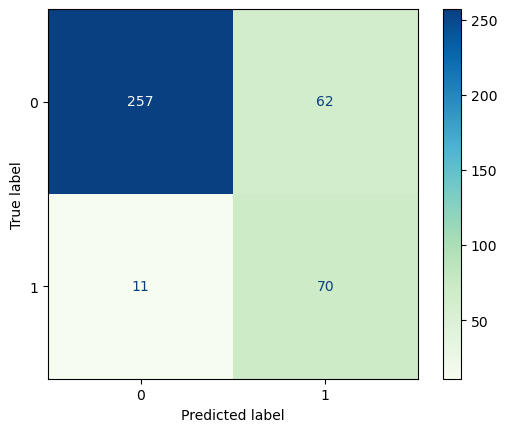

In [44]:
cm = confusion_matrix(y_val, cat_model.predict(X_val))
cmd = ConfusionMatrixDisplay(cm)
cmd.plot(cmap='GnBu');

#### 6) Random Forest Classifier Model

In [45]:
clf_rf = RandomForestClassifier()      
clf_rf.fit(X_train,y_train)
y_pred=pd.DataFrame(clf_rf.predict_proba(X_val))[1].values
score.append(roc_auc_score(y_val,y_pred))
np.array(score)

array([0.88091644, 0.78857541, 0.923391  , 0.92329425, 0.92542281,
       0.92325554])

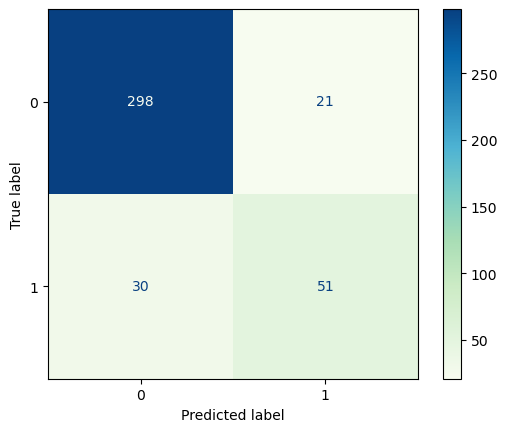

In [46]:
cm = confusion_matrix(y_val, clf_rf.predict(X_val))
cmd = ConfusionMatrixDisplay(cm)
cmd.plot(cmap='GnBu');

#### 7) Logistic Regression Model

In [47]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred=pd.DataFrame(log_reg.predict_proba(X_val))[1].values
score.append(roc_auc_score(y_val,y_pred))    
np.array(score)

array([0.88091644, 0.78857541, 0.923391  , 0.92329425, 0.92542281,
       0.92325554, 0.93041526])

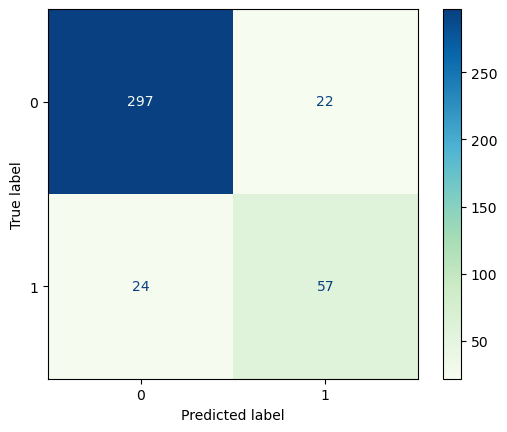

In [48]:
cm = confusion_matrix(y_val, log_reg.predict(X_val))
cmd = ConfusionMatrixDisplay(cm)
cmd.plot(cmap='GnBu');

#### 8) Support Vector Classifier Model

In [49]:
clf = SVC()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_val)
score.append(roc_auc_score(y_val,y_pred))    
np.array(score)

array([0.88091644, 0.78857541, 0.923391  , 0.92329425, 0.92542281,
       0.92325554, 0.93041526, 0.51234568])

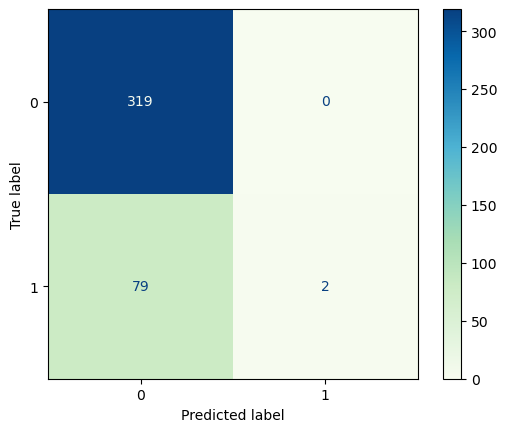

In [50]:
cm = confusion_matrix(y_val, clf.predict(X_val))
cmd = ConfusionMatrixDisplay(cm)
cmd.plot(cmap='GnBu');

In [51]:
# Create the classification report
from sklearn.metrics import classification_report
print(classification_report(y_val,y_pred))


              precision    recall  f1-score   support

           0       0.80      1.00      0.89       319
           1       1.00      0.02      0.05        81

    accuracy                           0.80       400
   macro avg       0.90      0.51      0.47       400
weighted avg       0.84      0.80      0.72       400



In [52]:
len(score)
len(model_list)

8

#### Plotting all the models to select the best model

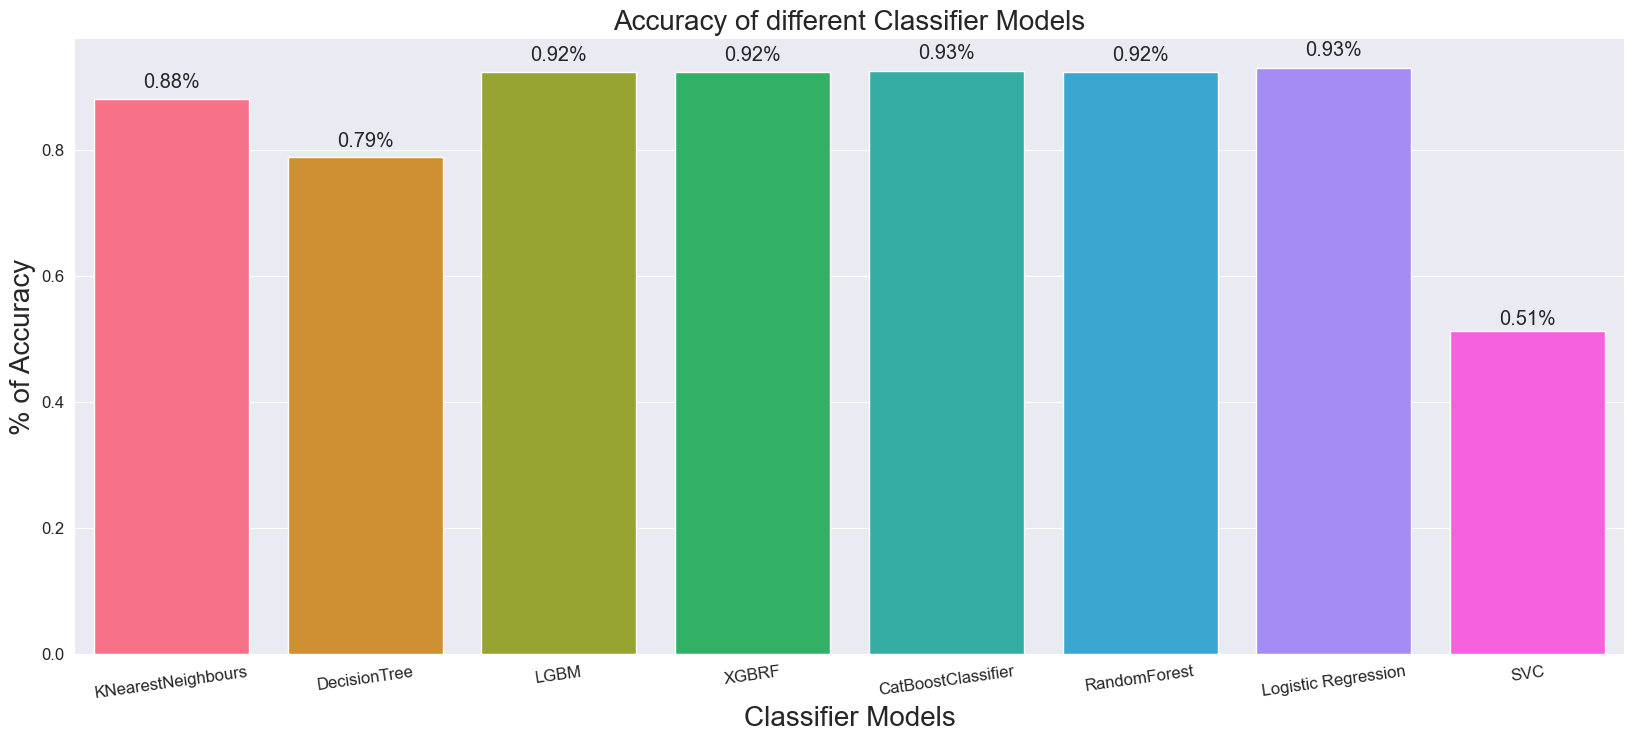

In [53]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=score, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02),\
                ha='center', fontsize = 'x-large')
plt.show()

#### From the above graph, CatBoost Classifier Model and Logistic Regression Model's Model are the best models whose accuracy is 93%. 

Text(0.5, 1.0, 'Visualization of the important features')

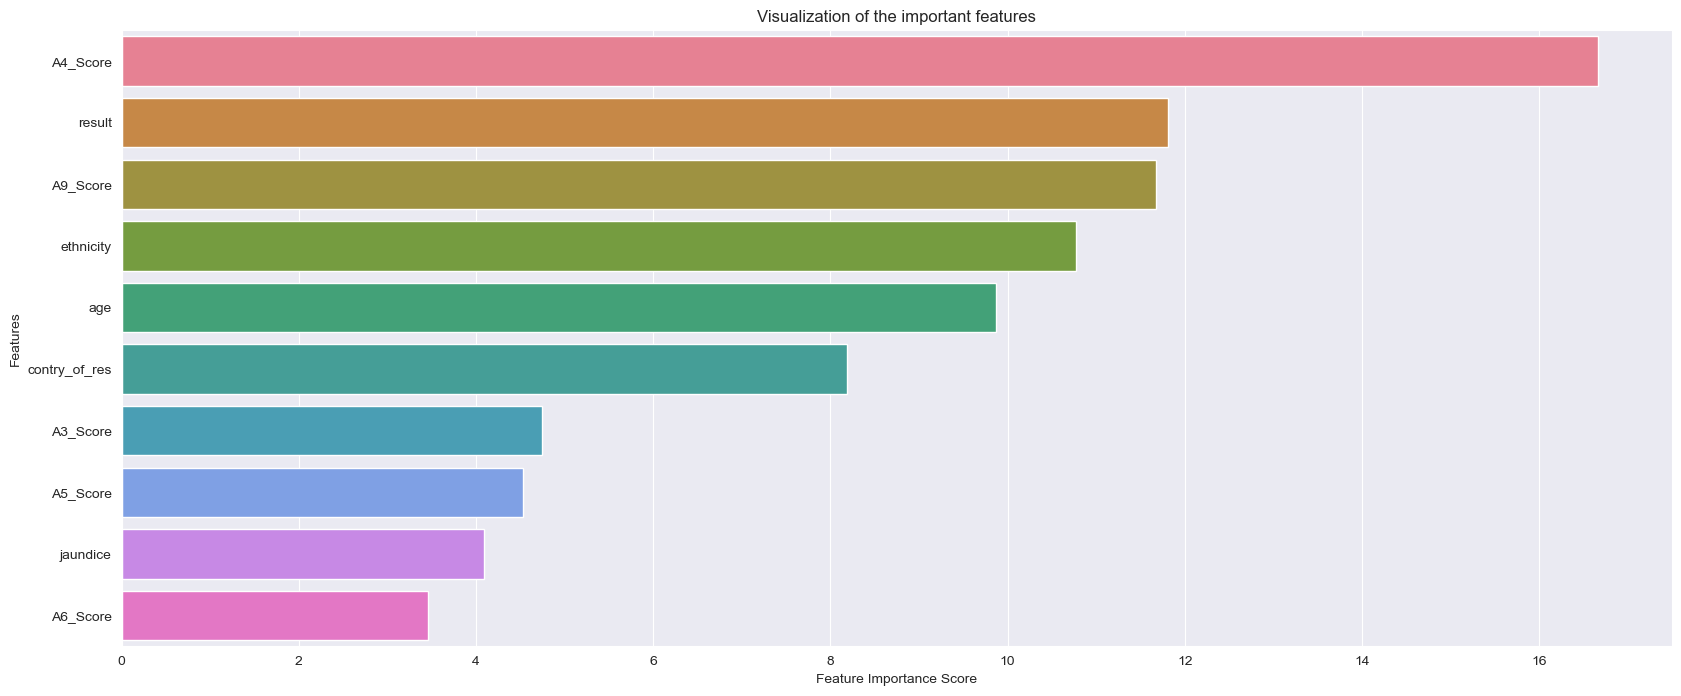

In [54]:
# Feature Importance
FeatureImp = pd.Series(cat_model.feature_importances_, index= X_train.columns)
FeatureImp.sort_values(ascending=False, inplace=True)
# Visualize the feature importance
# Creating a bar plot
import seaborn as sns
sns.barplot(x=FeatureImp.head(10), y = FeatureImp.head(10).index, palette = "husl")
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualization of the important features')

#### Transforming Test Set

In [55]:
#Cleaning:
test_set.ethnicity=test_set.ethnicity.str.replace('?','Others',regex=False)
test_set.relation=test_set.relation.str.replace('?','Others',regex=False)
test_set.relation=test_set.relation.str.replace('?','Others',regex=False)
test_set.relation=test_set.relation.str.replace('Health care professional','Others',regex=False)

#Encoding:

test_set['jaundice']=le.transform(test_set['jaundice'])
test_set['austim']=le.transform(test_set['austim'])


test_set.relation=test_set.relation.map(rel)
test_set.relation[test_set.relation.isna()]=len(rel)

test_set.ethnicity=test_set.ethnicity.map(eth)
test_set.ethnicity[test_set.ethnicity.isna()]=len(eth)

test_set.contry_of_res=test_set.contry_of_res.map(cont)
test_set.contry_of_res[test_set.contry_of_res.isna()]=len(cont)

# age_grouper(test_set)

#result of Scaling:
# test_set[['result','age']]=ss.transform(test_set[['result','age']])
# test_set[['result','age']]=rs.transform(test_set[['result','age']])

#result of feature engineering:

# test_set=test_set[cols]

In [56]:
pd.DataFrame(test_set).head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,ethnicity,jaundice,austim,contry_of_res,result,relation
0,1,1,0,0,1,1,0,0,1,1,15.599481,0,1,0,1.0,12.399055,0
1,1,0,0,0,0,0,0,1,0,0,27.181099,3,0,0,34.0,6.551598,0
2,1,1,1,0,1,1,0,1,1,1,31.643906,0,1,0,33.0,3.180663,0
3,0,0,0,0,0,0,0,0,0,0,25.369210,1,0,0,1.0,2.220766,0
4,0,0,0,1,0,0,0,0,0,0,9.078580,1,0,0,16.0,7.252028,0


In [57]:
predictions = pd.DataFrame(cat_model.predict_proba(test_set))[1].values

output = pd.DataFrame({'ID': test['ID'], 'Class/ASD': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [58]:
 output.head(20)

,ID,Class/ASD
0,1,0.595813
1,2,0.292277
2,3,0.620056
3,4,0.233142
4,5,0.339355
5,6,0.304696
6,7,0.729865
7,8,0.408236
8,9,0.224696
9,10,0.320208


### Conclusion:
#### After performing analysis on the above 8 different models, we saw that the Categorical Boost Classifier and Logistic Regression are the best Models which gave 93% accuracy. Identified the most important features and factors contributing to the prediction of autism which is depicted in the above Feature Importance graph. Understanding these factors can provide valuable insights into the underlying mechanisms and risk factors associated with autism spectrum disorder (ASD). 
